# Word Cloud using NLTK

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/text-minging/negative-words.txt
/kaggle/input/text-minging/positive-words.txt
/kaggle/input/text-minging/stop.txt


In [2]:
import requests   # Importing requests to extract content from a url
from bs4 import BeautifulSoup as bs # Beautifulsoup is for web scrapping...used to scrap specific content 
import re 

import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Pulling reviews from amazon for Iphone
Creating an empty reviews list

In [3]:
iphone_reviews=[]
for i in range(1,30):
  ip=[]  
  url="https://www.amazon.in/Apple-iPhone-13-256GB-Product/product-reviews/B09G9HDN4Q/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
  response = requests.get(url)
  soup = bs(response.content,"html.parser")# creating soup object to iterate over the extracted content 
  reviews = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})# Extracting the content under specific tags  
  for i in range(len(reviews)):
    ip.append(reviews[i].text)  
 
  iphone_reviews=iphone_reviews+ip

***iphone_reviews=[]***
This line initializes an empty list named iphone_reviews. This list will store the reviews extracted from the Amazon page.

***for i in range(1,30):***
This line starts a loop that iterates over a range of numbers from 1 to 29 (inclusive). It seems you're attempting to scrape multiple pages of reviews, iterating through page numbers.

***ip=[]***
Within each iteration of the loop, this line initializes an empty list named ip. This list will temporarily store the reviews extracted from the current page.

** *url***="
This line constructs the URL for the Amazon page containing iPhone 13 reviews. The str(i) is appended to the URL to iterate through different pages.

***response = requests.get(url)***
This line sends a GET request to the URL using the requests.get() function and stores the response in the response variable.

***soup = bs(response.content,"html.parser")***
Here, bs (Beautiful Soup) is used to parse the HTML content of the response. response.content contains the HTML content of the webpage, and "html.parser" specifies the parser to be used.

***reviews*** = soup.find_all("span",attrs={"class","a-size-base review-text review-text-content"})
This line finds all the <span> tags with the specified class attributes. These tags usually contain the text of the reviews on the Amazon page.

***for i in range(len(reviews)):***
This loop iterates over the indices of the reviews list.
    
***ip.append(reviews[i].text)***
For each review found on the page, this line extracts the text content (review text) and appends it to the ip list.

***iphone_reviews=iphone_reviews+ip***
Finally, this line concatenates the ip list (containing reviews from the current page) to the iphone_reviews list, which accumulates reviews from all pages.

In [4]:
iphone_reviews[:5]

['\nThe iPhone 13 128GB has surpassed my expectations in every aspect, setting a new standard for smartphone excellence. From its sleek design to its powerful performance and innovative features, this device has truly redefined what it means to own a premium smartphone.Design and Build Quality:The iPhone 13’s design is a masterpiece of craftsmanship, featuring a sleek aluminum frame and a stunning ceramic shield front cover. The device feels incredibly premium in hand, with its compact form factor and exquisite attention to detail. The IP68 water and dust resistance provide added durability and peace of mind, making it perfect for everyday use.Display:The Super Retina XDR display of the iPhone 13 is nothing short of breathtaking. The 6.1-inch OLED screen delivers vibrant colors, deep blacks, and excellent brightness levels, ensuring an immersive viewing experience for everything from streaming videos to browsing the web. The True Tone technology adapts the display to ambient lighting c

# Joinining all the reviews into single paragraph

In [5]:
import nltk
ip_rev_string = " ".join(iphone_reviews)

print(ip_rev_string[:1000])


The iPhone 13 128GB has surpassed my expectations in every aspect, setting a new standard for smartphone excellence. From its sleek design to its powerful performance and innovative features, this device has truly redefined what it means to own a premium smartphone.Design and Build Quality:The iPhone 13’s design is a masterpiece of craftsmanship, featuring a sleek aluminum frame and a stunning ceramic shield front cover. The device feels incredibly premium in hand, with its compact form factor and exquisite attention to detail. The IP68 water and dust resistance provide added durability and peace of mind, making it perfect for everyday use.Display:The Super Retina XDR display of the iPhone 13 is nothing short of breathtaking. The 6.1-inch OLED screen delivers vibrant colors, deep blacks, and excellent brightness levels, ensuring an immersive viewing experience for everything from streaming videos to browsing the web. The True Tone technology adapts the display to ambient lighting cond

# From nltk.corpus import stopwords
# Removing unwanted symbols incase if exists

In [6]:
ip_rev_string = re.sub("[^A-Za-z" "]+"," ", ip_rev_string).lower()
ip_rev_string = re.sub("[0-9" "]+"," ", ip_rev_string)

In [7]:
ip_rev_string[:1000]

' the iphone gb has surpassed my expectations in every aspect setting a new standard for smartphone excellence from its sleek design to its powerful performance and innovative features this device has truly redefined what it means to own a premium smartphone design and build quality the iphone s design is a masterpiece of craftsmanship featuring a sleek aluminum frame and a stunning ceramic shield front cover the device feels incredibly premium in hand with its compact form factor and exquisite attention to detail the ip water and dust resistance provide added durability and peace of mind making it perfect for everyday use display the super retina xdr display of the iphone is nothing short of breathtaking the inch oled screen delivers vibrant colors deep blacks and excellent brightness levels ensuring an immersive viewing experience for everything from streaming videos to browsing the web the true tone technology adapts the display to ambient lighting conditions providing a comfortable

# Words that contained in iphone review

In [8]:
ip_reviews_words = ip_rev_string.split(" ")

# TFIDF

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(use_idf=True,ngram_range=(1, 1))
X = vectorizer.fit_transform(ip_reviews_words)

# Importing TfidfVectorizer:

We are importing the TfidfVectorizer class from the ***sklearn.feature_extraction***.text module. This class is used to convert a collection of raw documents into a matrix of TF-IDF features.

# Initializing TfidfVectorizer: 

We are creating an instance of *TfidfVectorizer* with specific parameters:

***use_idf=True***: 

This indicates whether to use IDF (Inverse Document Frequency) reweighting. IDF reweighting helps in diminishing the importance of terms that occur frequently across documents.

***ngram_range=(1, 1)***:

This specifies that you're only considering unigrams (single words). You can adjust this parameter to consider bigrams, trigrams, or a range of n-grams.

# Transforming Text Data:

We are applying the *fit_transform()* method of the *TfidfVectorizer* object (vectorizer) to your input data *(ip_reviews_words)*. This method first fits the vectorizer to your data to learn the vocabulary (i.e., unique words), and then transforms the data into a *TF-IDF* matrix representation.

***fit_transform(ip_reviews_words)***:

This method fits the vectorizer to the input data (ip_reviews_words) and transforms the data into a TF-IDF matrix (X). The resulting matrix X will have dimensions (number of documents) x (number of unique words in the vocabulary), where each element represents the TF-IDF score of a word in a document.

After executing this code, we have a *TF-IDF* matrix *X* containing the transformed representation of your input text data.

In [10]:
with open("/kaggle/input/text-minging/stop.txt", "r") as sw:
    stop_words = sw.read().splitlines()

In [11]:
stop_words[:10]

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after']

In [12]:
stop_words.extend(["iphone","mobile","time","ios","phone","device","screen","battery","product","good","day","price, i phone, gb"])

In [13]:
ip_reviews_words = [w for w in ip_reviews_words if not w in stop_words]

# List Comprehension: 

The code utilizes a list comprehension, which is a concise way to create lists in Python.

# Filtering out Stop Words:

The expression ***[w for w in ip_reviews_words if not w in stop_words]*** iterates through each word w in the ip_reviews_words list. If the word w is not found in the stop_words list, it is retained in the filtered list.

In [14]:
ip_reviews_words[:10]

['',
 'gb',
 'surpassed',
 'expectations',
 'aspect',
 'setting',
 'standard',
 'smartphone',
 'excellence',
 'sleek']

# Joinining all the reviews into single paragraph

In [15]:
ip_rev_string = " ".join(ip_reviews_words)

In [16]:
ip_rev_string[:1000]

' gb surpassed expectations aspect setting standard smartphone excellence sleek design powerful performance innovative features redefined means premium smartphone design build quality design masterpiece craftsmanship featuring sleek aluminum frame stunning ceramic shield front cover feels incredibly premium hand compact form factor exquisite attention detail ip water dust resistance provide added durability peace mind making perfect everyday display super retina xdr display short breathtaking inch oled delivers vibrant colors deep blacks excellent brightness levels ensuring immersive viewing experience streaming videos browsing web true tone technology adapts display ambient lighting conditions providing comfortable viewing experience times performance powered bionic chip delivers unparalleled performance responsiveness apps launch instantly animations buttery smooth multitasking breeze efficient cpu gpu gaming productivity tasks content creation handles ease making true powerhouse pal

# WordCloud can be performed on the string inputs.

Corpus level word cloud

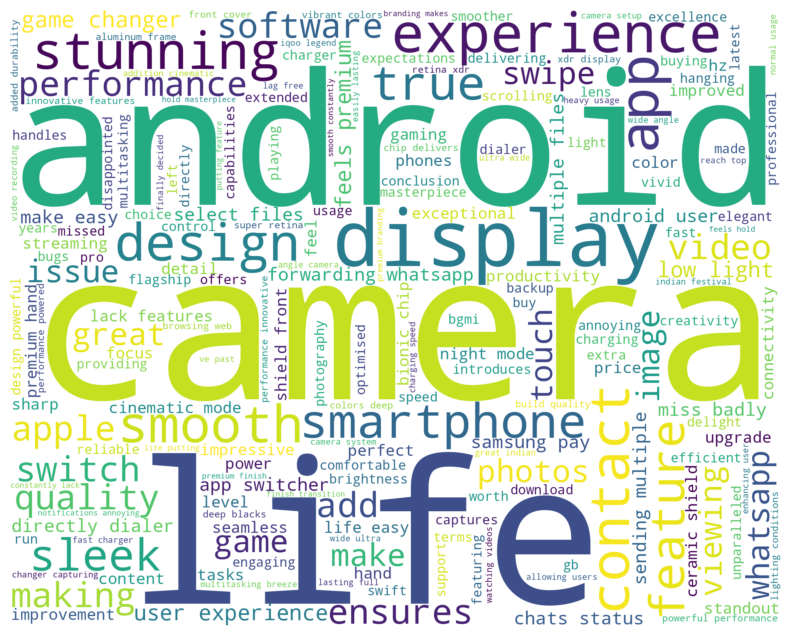

In [17]:
wordcloud_ip = WordCloud(
                    background_color='White',
                    width = 2000,
                    height=1600
                    ).generate(ip_rev_string)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_ip, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

***WordCloud***: 

This is the class responsible for generating the word cloud. You're setting parameters such as background_color, width, and height here. The generate() method is used to generate the word cloud from the text stored in ip_rev_string.

***plt.figure()***: 

This function initializes a new figure for plotting. You're specifying the size of the figure using the figsize parameter.

***plt.imshow()*:** 

This function displays the image of the word cloud. The interpolation parameter is set to 'bilinear' to make the image appear smoother.

***plt.axis('off')***: 

This line hides the axes of the plot.

***plt.show()*:**

This line displays the plot containing the word cloud.

# Positive words

*Choose the path for +ve words stored in system*

In [18]:
with open("/kaggle/input/text-minging/positive-words.txt", "r") as ps:
    poswords = ps.read().splitlines()
poswords[:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

# Positive World cloud

*Choosing the only words which are present in positive words

In [19]:
ip_pos_in_pos = " ".join ([w for w in ip_reviews_words if w in poswords])

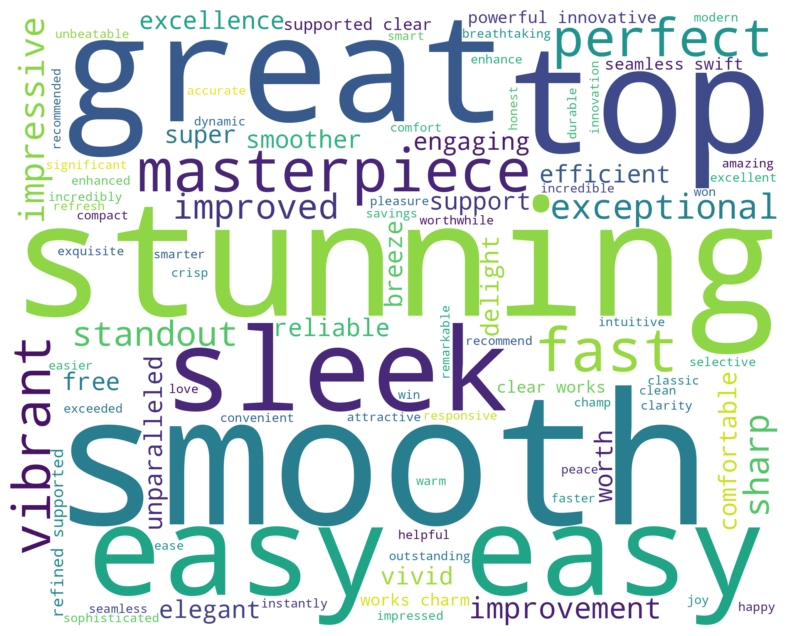

In [20]:
wordcloud_pos_in_pos = WordCloud(
                      background_color='White',
                      width=2000,
                      height=1600
                     ).generate(ip_pos_in_pos)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_pos_in_pos, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

# Negative World cloud

*Choosing Words Choose path for -ve words in system*

In [21]:
with open("/kaggle/input/text-minging/negative-words.txt", "r") as nw:
    negwords = nw.read().splitlines()
negwords[:10]

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted']

In [22]:
ip_neg_in_pos = " ".join([w for w in ip_reviews_words if w in negwords])

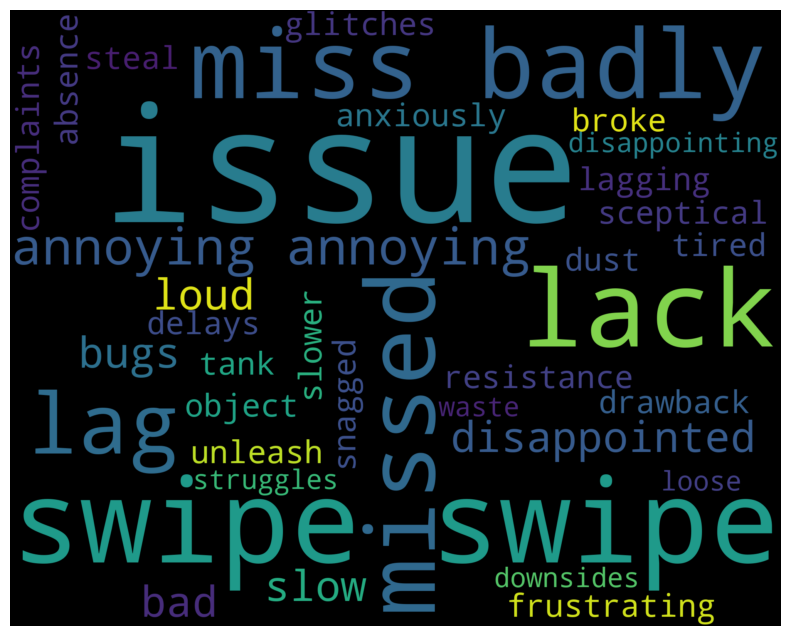

In [23]:
wordcloud_neg_in_neg = WordCloud(
                            background_color="black",
                            width=2000,
                            height=1600
                            ).generate(ip_neg_in_pos)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud_neg_in_neg, interpolation='bilinear')
plt.axis('off')  # Hide axes
plt.show()

In [24]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
from wordcloud import WordCloud, STOPWORDS
text = ip_rev_string.lower()

# Removing Single Quote early since it cause tokenizer problem

In [26]:
text = text.replace("'","")

tokens = nltk.word_tokenize(text)
text1 = nltk.Text(tokens)

*text.replace("'", "")* removes all occurrences of single quotes from the text.

***nltk.word_tokenize()*** is used to tokenize the text into a list of words.

*nltk.Text()* is used to create a Text object from the tokens, which allows you to perform various text operations, such as finding collocations . Now, you have tokens containing the words of the text without single quotes, and you can perform further processing as needed.

# Remove Extra chars and remove stopwords.

In [27]:
text_content = [''.join(re.split("[.,;: .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]

# Create a set of stopwords

In [28]:
stopwords_wc = set(STOPWORDS)
customised_words = ["price","great"]  # If you want to remove any particular word form text which does not contribute much in meaning

In [29]:
new_stopwords = stopwords_wc.union(customised_words)

# Removing stop words

In [30]:
tex_content = [word for word in text_content if word not in new_stopwords]

# Take only one- empty entries

In [31]:
text_content = [s for s in text_content if len(s) != 0]

If you face any issue like Resource ***corpora/wordnet.zip/wordnet/.zip/' not found*** while using NLTK use following command to unzip the zip file 

In [32]:
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: /usr/share/nltk_data/corpora/wordnet/
  inflating: /usr/share/nltk_data/corpora/wordnet/lexnames  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adv  
  inflating: /usr/share/nltk_data/corpora/wordnet/adv.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.verb  
  inflating: /usr/share/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /usr/share/nltk_data/corpora/wordnet/data.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.adj  
  inflating: /usr/share/nltk_data/corpora/wordnet/LICENSE  
  inflating: /usr/share/nltk_data/corpora/wordnet/citation.bib  
  inflating: /usr/share/nltk_data/corpora/wordnet/noun.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/verb.exc  
  inflating: /usr/share/nltk_data/corpora/wordnet/README  
  inflating: /usr/share/nltk_data/corpora/wordnet/index.sense  
  inflating: /usr/share/nltk_data

In [33]:
import nltk
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
WNL = WordNetLemmatizer()

# Assuming text_content is defined elsewhere in your code
# Lemmatize the words in text_content
text_content = [WNL.lemmatize(t) for t in text_content]

# Create bigrams from the lemmatized words
bigram_list = list(nltk.bigrams(text_content))

# Print the first 100 bigrams
print(bigram_list[:100])

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[('gb', 'surpassed'), ('surpassed', 'expectation'), ('expectation', 'aspect'), ('aspect', 'setting'), ('setting', 'standard'), ('standard', 'smartphone'), ('smartphone', 'excellence'), ('excellence', 'sleek'), ('sleek', 'design'), ('design', 'powerful'), ('powerful', 'performance'), ('performance', 'innovative'), ('innovative', 'feature'), ('feature', 'redefined'), ('redefined', 'mean'), ('mean', 'premium'), ('premium', 'smartphone'), ('smartphone', 'design'), ('design', 'build'), ('build', 'quality'), ('quality', 'design'), ('design', 'masterpiece'), ('masterpiece', 'craftsmanship'), ('craftsmanship', 'featuring'), ('featuring', 'sleek'), ('sleek', 'aluminum'), ('aluminum', 'frame'), ('frame', 'stunning'), ('stunning', 'ceramic'), ('ceramic', 'shield'), ('shield', 'front'), ('front', 'cover'), ('cover', 'feel'), ('feel', 'incredibly'), ('incredibly', 'premium'), ('pr

***Import NLTK***:

The first line import nltk imports the Natural Language Toolkit (NLTK) library, which is a popular Python library for natural language processing tasks.

***Lemmatization:*** The next block of code *text_content = WNL.lemmatize(t)* for t in text_content performs lemmatization. Here's what each part does:

***WNL = WordNetLemmatizer()***:

This initializes the WordNet Lemmatizer, which is a tool for reducing words to their base or dictionary form (known as lemmas). *WNL.lemmatize(t)* for t in text_content: This is a list comprehension. It iterates over each word t in the text_content list and applies the lemmatization function *(WNL.lemmatize())* to each word, returning a new list with the lemmatized words. 

***Bigram Generation***: 

The next block of code bigram_list = *list(nltk.bigrams(text_content))* generates bigrams from the lemmatized words. Here's what each part does:

***nltk.bigrams(text_content)***:

This function takes a list of tokens (in this case, lemmatized words) and generates a sequence of tuples, each containing two consecutive tokens. It creates bigrams from the input list. *list()*: This converts the bigram sequence generated by *nltk.bigrams()* into a list. The reason for doing this is that *nltk.bigrams()* returns an iterator, and converting it to a list allows us to access and print the bigrams easily. 

***Print Bigram List***: 

Finally, *print(bigram_list)* prints the list of bigrams generated in the previous step.

In [34]:
dictionary2 = [' '.join(tup) for tup in bigram_list] # creating Tuples
print(dictionary2[:100])


['gb surpassed', 'surpassed expectation', 'expectation aspect', 'aspect setting', 'setting standard', 'standard smartphone', 'smartphone excellence', 'excellence sleek', 'sleek design', 'design powerful', 'powerful performance', 'performance innovative', 'innovative feature', 'feature redefined', 'redefined mean', 'mean premium', 'premium smartphone', 'smartphone design', 'design build', 'build quality', 'quality design', 'design masterpiece', 'masterpiece craftsmanship', 'craftsmanship featuring', 'featuring sleek', 'sleek aluminum', 'aluminum frame', 'frame stunning', 'stunning ceramic', 'ceramic shield', 'shield front', 'front cover', 'cover feel', 'feel incredibly', 'incredibly premium', 'premium hand', 'hand compact', 'compact form', 'form factor', 'factor exquisite', 'exquisite attention', 'attention detail', 'detail ip', 'ip water', 'water dust', 'dust resistance', 'resistance provide', 'provide added', 'added durability', 'durability peace', 'peace mind', 'mind making', 'making

***' '.join(tup) for tup in bigram_list*** 

A list comprehension that iterates over each tuple (tup) in bigram_list.

For each tuple, it joins its elements with a space using ' '.join(tup), creating a single string representing the bigram.

The resulting list dictionary2 contains bigram strings.

# Using Count vectorizer to view the frequency of bigrams

In [35]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(2,2))
bag_of_words = vectorizer.fit_transform(dictionary2)
# Sort the vocabulary dictionary based on indices
sorted_vocab = sorted(vectorizer.vocabulary_.items(), key=lambda x: x[1])

# Take the first 100 items from the sorted vocabulary
first_100_bigrams = dict(sorted_vocab[:100])

# Print the first 100 bigrams
print(first_100_bigrams)

{'absence charger': 0, 'absolute steal': 1, 'absolutely stunning': 2, 'accurate color': 3, 'achieve professional': 4, 'adapter box': 5, 'adapts display': 6, 'add cinematic': 7, 'add file': 8, 'add professional': 9, 'add touch': 10, 'added durability': 11, 'addition cinematic': 12, 'adopt method': 13, 'advancement enhance': 14, 'aerospace grade': 15, 'aesthetic preference': 16, 'allowing user': 17, 'alphabet shown': 18, 'aluminum frame': 19, 'amazing heating': 20, 'ambient lighting': 21, 'andorid dialer': 22, 'android apple': 23, 'android basic': 24, 'android boy': 25, 'android finally': 26, 'android iqoo': 27, 'android issue': 28, 'android make': 29, 'android phone': 30, 'android refined': 31, 'android sceptical': 32, 'android simple': 33, 'android tired': 34, 'android user': 35, 'android whatsapp': 36, 'angle camera': 37, 'animation buttery': 38, 'annoying clearing': 39, 'annoying perfect': 40, 'annoying reach': 41, 'annoying thing': 42, 'anxiously searching': 43, 'app launch': 44, 'a

We initialize CountVectorizer with ngram_range=(2, 2) to specify that we want to create bigrams.

fit_transform() is called on the list of bigram strings (dictionary2) to transform them into a bag of words representation.

vectorizer.vocabulary_ returns a dictionary where the keys are the bigrams and the values are the indices assigned to them in the bag of words representation.

In [36]:
sum_words = bag_of_words.sum(axis=0) # axis = 0 means rows
words_freq = [(word,sum_words[0,idx]) for word,idx in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse= True)  
print(words_freq[:100])

[('feel premium', 12), ('game changer', 8), ('user experience', 8), ('low light', 8), ('forwarding whatsapp', 8), ('android user', 8), ('app switcher', 8), ('make easy', 8), ('directly dialer', 8), ('miss badly', 8), ('sending multiple', 8), ('multiple file', 8), ('select file', 8), ('chat status', 8), ('samsung pay', 8), ('ceramic shield', 6), ('shield front', 6), ('premium hand', 6), ('bionic chip', 6), ('night mode', 6), ('cinematic mode', 6), ('lack feature', 6), ('life easy', 6), ('android apple', 6), ('sleek design', 4), ('design powerful', 4), ('powerful performance', 4), ('performance innovative', 4), ('innovative feature', 4), ('build quality', 4), ('aluminum frame', 4), ('front cover', 4), ('added durability', 4), ('super retina', 4), ('retina xdr', 4), ('xdr display', 4), ('vibrant color', 4), ('color deep', 4), ('deep black', 4), ('viewing experience', 4), ('browsing web', 4), ('lighting condition', 4), ('performance powered', 4), ('chip delivers', 4), ('multitasking breeze

*sum_words = bag_of_words.sum(axis=0)*: 

This line sums the occurrences of each word (bigram) across all documents. Since bag_of_words is a sparse matrix, sum(axis=0) calculates the sum along the columns, resulting in a row vector containing the total count of each word (bigram) in the entire corpus.

*words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]*:

This line creates a list of tuples where each tuple contains a bigram and its corresponding frequency. It iterates over the items of vectorizer.vocabulary_, which is a dictionary mapping words (bigrams) to their indices, and retrieves the frequency of each word from sum_words.

*words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)*:

This line sorts the list of tuples based on the frequency of the bigrams in descending order. It uses a lambda function as the key to specify that the sorting should be based on the second element of each tuple (i.e., the frequency).

*print(words_freq[:1000])*:
Finally, this line prints the top 1000 bigrams by frequency.

This code will give you the top 1000 bigrams sorted by frequency in descending order. Adjust the slice [:1000] accordingly if you need a different number of top bigrams.

# Getting WordCloud

In [37]:
words_dict = dict(words_freq)
WC_height = 2000
WC_width = 1900
WC_max_words = 300
wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width= WC_width, stopwords=new_stopwords)
wordCloud.generate_from_frequencies(words_dict)

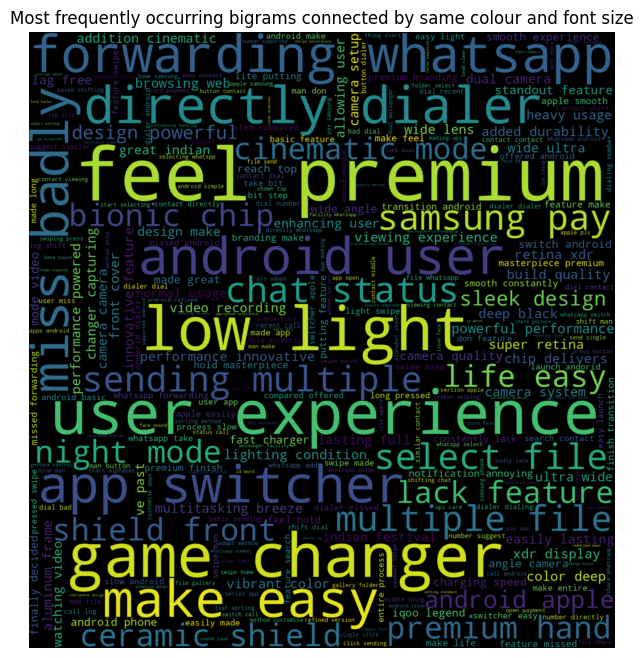

In [38]:
plt.figure(figsize=(10, 8))
plt.title('Most frequently occurring bigrams connected by same colour and font size')
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()
